In [17]:
%cd /home/smalani/Cybernetic

from growth_and_opto import odeFun, parFun_growth
from scipy.integrate import solve_ivp
import numpy as np

/home/smalani/Cybernetic


In [51]:
out = []
out_t = []

# X, G, E, O, e1, e2, e3, C
# initial = 1, 0, 3.5, 7.5, 0.4, 0.4, 0.4, 0
initial = 0.1, 9, 0, 7.5, 0., 0., 0., 0, 0, 0

# initial = 0.1, 9, 0, 0, 0., 0., 0., 0, 0, 0
tspan = [0, 40]

def I_fun_base(t, u, period, Imax):
    remainder = t - np.floor(t/period) * period

    I_out = np.zeros(np.array(t).size)
    I_out[remainder < u * period] = Imax
    return I_out
    # if remainder < u * period:
    #     return Imax
    # else:
    #     return 0

D=0
I = 10000

u = 0.0
print(u)
period = 100 / 60 / 60
Imax = 10000

I = lambda t: I_fun_base(t, u, period, Imax)

pars_growth = parFun_growth(alpha_star = [0.0,0.1,0.1])$, kLa=0)

sol = solve_ivp(odeFun, tspan, initial, args=(D, I, None, pars_growth, None), 
                    rtol=1e-5, atol=1e-8, 
                    method='BDF',
                    # max_step = 0.01
                )

print(sol.success)
print(sol.message)


out.append(sol.y)
out_t.append(sol.t)


out = np.concatenate(out,axis=1)
out_t = np.concatenate(out_t)

print(out.shape)
print(out_t.shape)

0.0
True
The solver successfully reached the end of the integration interval.
(10, 79)
(79,)


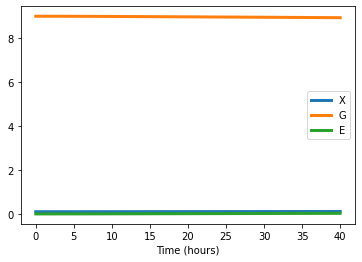

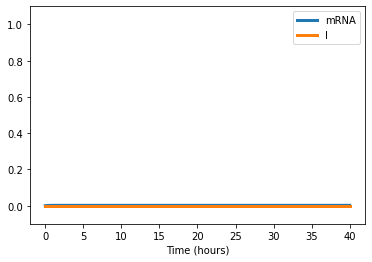

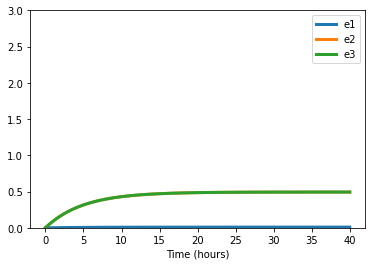

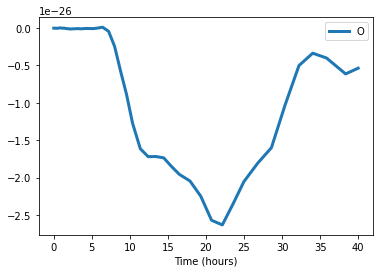

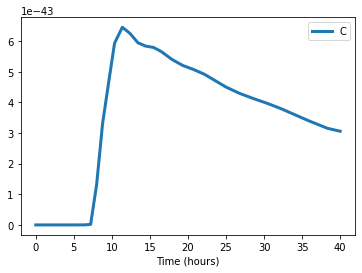

In [52]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(out_t, out[0,:], label='X', linewidth=3)
plt.plot(out_t, out[1,:], label='G', linewidth=3)
plt.plot(out_t, out[2,:], label='E', linewidth=3)
plt.xlabel('Time (hours)')
plt.legend()

plt.figure()
# plt.plot(out_t, out[8,:], label='TFon')
plt.plot(out_t, out[9,:], label='mRNA', linewidth=3)
plt.plot(out_t, I(out_t)/Imax, label='I', linewidth=3)
plt.xlabel('Time (hours)')
plt.ylim(-0.1,1.1)
plt.legend()

# plt.figure()
# # plt.plot(out_t, out[8,:], label='TFon')
# plt.plot(out_t, out[9,:], label='mRNA', linewidth=3)
# plt.xlabel('Time (hours)')
# plt.legend()

plt.figure()
plt.plot(out_t, out[4,:], label='e1', linewidth=3)
plt.plot(out_t, out[5,:], label='e2', linewidth=3)
plt.plot(out_t, out[6,:], label='e3', linewidth=3)
plt.ylim([0,3])
plt.xlabel('Time (hours)')
plt.legend()

plt.figure()
plt.plot(out_t, out[3,:], label='O', linewidth=3)
plt.xlabel('Time (hours)')
plt.legend()


plt.figure()
plt.plot(out_t, out[7,:], label='C', linewidth=3)
plt.xlabel('Time (hours)')
plt.legend()



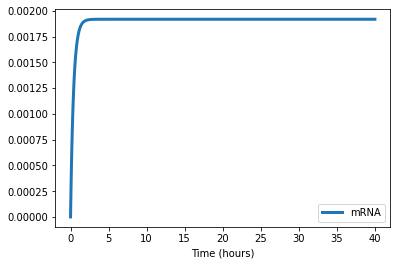

In [53]:
plt.figure()
# plt.plot(out_t, out[8,:], label='TFon')
plt.plot(out_t, out[9,:], label='mRNA', linewidth=3)
plt.xlabel('Time (hours)')
plt.legend()

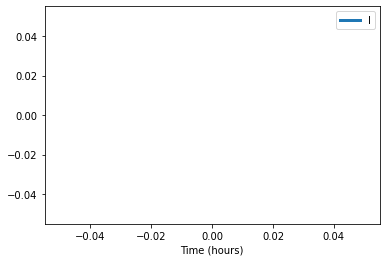

In [54]:
index1 = 1000
index2 = index1 + 100

plt.figure()
# plt.plot(out_t, out[8,:], label='TFon')
# plt.plot(out_t[index1:index2], out[9,:][index1:index2], label='mRNA', linewidth=3)
plt.plot(out_t[index1:index2], I(out_t[index1:index2])/Imax, label='I', linewidth=3)
plt.xlabel('Time (hours)')
plt.legend()

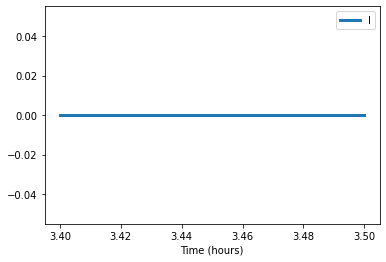

In [55]:
index1 = 1000
index2 = index1 + 100

myt = np.linspace(3.4, 3.5,1000)

plt.figure()
# plt.plot(out_t, out[8,:], label='TFon')
# plt.plot(out_t[index1:index2], out[9,:][index1:index2], label='mRNA', linewidth=3)
plt.plot(myt, I(myt)/Imax, label='I', linewidth=3)
plt.xlabel('Time (hours)')
plt.legend()